## Cloning quasars

Use two cloning methods to increase the number of samples of the redshift data with the respect to the initial 10000 samples data

In [2]:
from astroML.datasets import fetch_dr7_quasar
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.interpolate import interp1d

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

# Parameters
Nsamples=100000 # samples taken from the distribution
Nbins = 100

Perform the rejection sampling

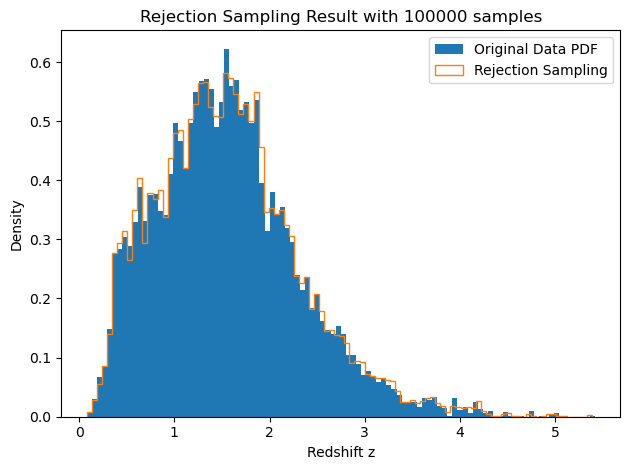

In [3]:
counts,bins,_ = plt.hist(z,bins=Nbins,density=True, label='Original Data PDF')
binwidth = bins[1]-bins[0]

#Rejection sampling
xmax = np.max(z)
xmin = np.min(z)
ymax = np.max(counts)

x = np.random.uniform(xmin,xmax,Nsamples)
y = np.random.uniform(0,ymax,Nsamples)
ind = np.digitize(x,bins)-1 # to account for 0-based index.
# needed to understand in which bin the x value fall in

goodpoints = x[y<counts[ind]]
plt.hist(goodpoints,bins=Nbins,density=True,histtype='step',label='Rejection Sampling');
plt.title(f'Rejection Sampling Result with {Nsamples} samples')
plt.xlabel('Redshift z')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Perform the inverse transform sampling. Before check the CDF

In [4]:
#Inverse transform sampling
eps = np.random.uniform(0,1,Nsamples)
cdf_vals = np.cumsum(counts) * binwidth
cdf_vals = np.insert(cdf_vals, 0, 0)  # CDF starts at 0 at the leftmost edge
# For CDF: interpolate CDF values at bin edges to get a function that can be used later on
cdf_interp = interp1d(bins, cdf_vals, kind='linear', bounds_error=False, fill_value=(0,1))

Let's put it into a graph

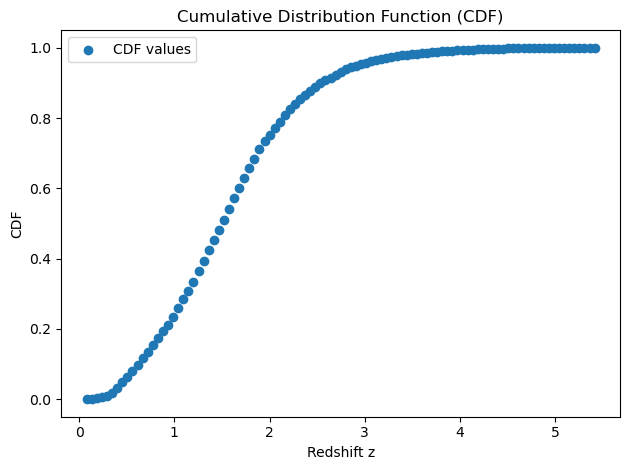

In [5]:
plt.figure()
plt.scatter(bins,cdf_interp(bins),label='CDF values')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Redshift z')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()

Compute the inverse CDF

In [6]:
# For inverse CDF: interpolate bin edges as a function of CDF values
inv_cdf_interp = interp1d(cdf_vals, bins, kind='linear', bounds_error=False, fill_value=(bins[0], bins[-1]))

Seems linear in the log-log scale. Let's fit it with a simple fit

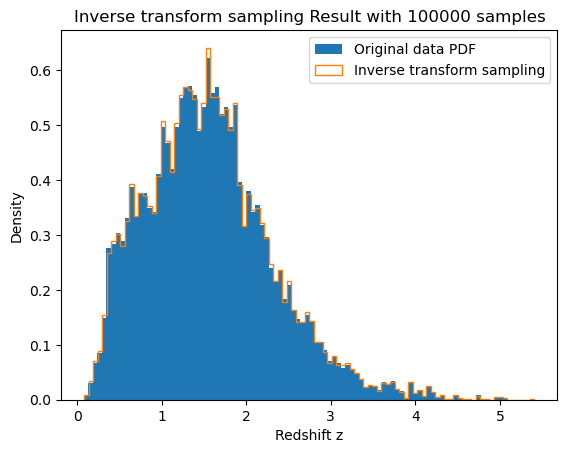

In [7]:
# Using a vanilla root finder, which solves for cdf(h)=eps i.e. finds the zero of the function cdf(x)-eps
#samples = [ optimize.brentq(lambda h: cdf_interp(h)-e, 0, Nbins) for e in eps]
samples = inv_cdf_interp(eps)
plt.figure()
plt.hist(z, bins=Nbins, density=True, label='Original data PDF')
plt.hist(samples, bins=Nbins, density=True, histtype='step', label='Inverse transform sampling')
plt.xlabel('Redshift z')
plt.ylabel('Density')
plt.title(f'Inverse transform sampling Result with {Nsamples} samples')
plt.legend()
plt.show()

Let's put it together

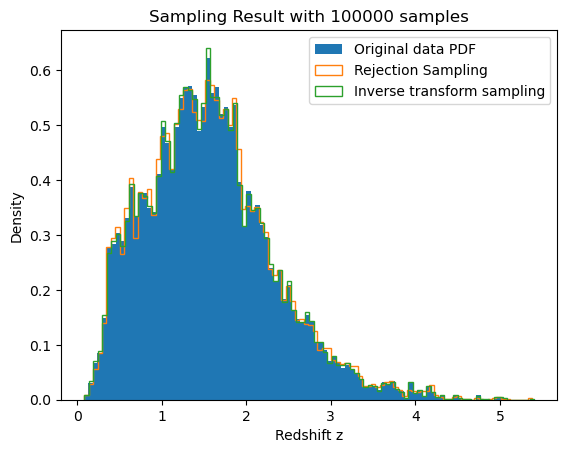

In [9]:
plt.figure()
plt.hist(z, bins=Nbins, density=True, label='Original data PDF')
plt.hist(goodpoints,bins=Nbins,density=True,histtype='step',label='Rejection Sampling');
plt.hist(samples, bins=Nbins, density=True, histtype='step', label='Inverse transform sampling')
plt.xlabel('Redshift z')
plt.ylabel('Density')
plt.title(f'Sampling Result with {Nsamples} samples')
plt.legend()
plt.show()